In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
import warnings

warnings.filterwarnings("ignore")

import os
import mpl_toolkits
import json

print('liberaries are imported successfully')


liberaries are imported successfully


In [2]:
df = pd.read_csv("/content/owid-covid-data.csv", error_bad_lines=False)

df

Skipping line 3947: expected 67 fields, saw 68
Skipping line 8121: expected 67 fields, saw 70



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257204,QAT,Asia,Qatar,2023-04-21,506323.0,220.0,344.857,690.0,0.0,0.0,...,26.9,NaN,1.2,80.23,0.848,2695131.0,NaN,NaN,NaN,NaN
257205,QAT,Asia,Qatar,2023-04-22,506323.0,0.0,344.857,690.0,0.0,0.0,...,26.9,NaN,1.2,80.23,0.848,2695131.0,NaN,NaN,NaN,NaN
257206,QAT,Asia,Qatar,2023-04-23,506323.0,0.0,210.143,690.0,0.0,0.0,...,26.9,NaN,1.2,80.23,0.848,2695131.0,NaN,NaN,NaN,NaN
257207,QAT,Asia,Qatar,2023-04-24,506323.0,0.0,168.143,690.0,0.0,0.0,...,26.9,NaN,1.2,80.23,0.848,2695131.0,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.327020e+05,2.517060e+05,2.507760e+05,2.194600e+05,251729.000000,232702.000000,251704.000000,250775.000000,219459.000000,251727.000000,...,149367.000000,99013.000000,179378.000000,236182.000000,1.970540e+05,2.572060e+05,9484.000000,9484.000000,9484.000000,9484.000000
mean,5.058356e+06,7.619813e+03,7.647909e+03,5.913728e+04,61.944448,100924.879829,149.443619,149.994312,861.283620,0.940024,...,32.133885,49.935695,2.966235,73.505587,1.423776e+02,1.061064e+08,36077.270340,9.866175,11.656216,1602.346114
std,2.845301e+07,9.358593e+04,7.536504e+04,2.577477e+05,438.643456,151238.125958,1063.563670,583.007480,1107.721768,5.245071,...,13.701983,33.008516,2.583539,7.611292,6.288367e+04,4.708048e+08,94509.350296,13.166178,26.341577,1943.964418
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.735000,1.188000,0.100000,0.563000,3.940000e-01,4.700000e+01,-37726.098000,-44.230000,-95.920000,-2752.924800
25%,9.515000e+03,0.000000e+00,7.140000e-01,1.520000e+02,0.000000,2741.766000,0.000000,0.144500,55.444000,0.000000,...,20.600000,15.950000,1.200000,67.920000,5.940000e-01,5.931620e+05,73.325017,1.117500,-1.732500,51.089301
50%,7.990400e+04,3.000000e+00,3.200000e+01,1.219000e+03,0.000000,27016.168500,0.294000,7.711000,386.829000,0.000000,...,31.400000,50.540000,2.110000,74.990000,7.400000e-01,5.540745e+06,4381.799250,7.580000,5.860000,990.432300
75%,6.659310e+05,2.900000e+02,5.148570e+02,1.055475e+04,3.000000,128872.507000,37.606750,86.370500,1308.698000,0.199000,...,42.400000,82.502000,4.200000,79.380000,8.380000e-01,2.791454e+07,28041.250750,15.422500,16.682500,2667.038825
max,4.255386e+08,7.213802e+06,6.109825e+06,2.902099e+06,20625.000000,737554.506000,193107.077000,31207.174000,6504.190000,583.919000,...,76.100000,98.999000,59.290000,86.750000,2.791454e+07,4.721383e+09,889935.300000,76.550000,377.630000,10292.916000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257209 entries, 0 to 257208
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    257209 non-null  object 
 1   continent                                   244908 non-null  object 
 2   location                                    257209 non-null  object 
 3   date                                        257209 non-null  object 
 4   total_cases                                 232702 non-null  float64
 5   new_cases                                   251706 non-null  float64
 6   new_cases_smoothed                          250776 non-null  float64
 7   total_deaths                                219460 non-null  float64
 8   new_deaths                                  251729 non-null  float64
 9   new_deaths_smoothed                         250804 non-null  object 
 

In [5]:
df.shape


(257209, 67)

In [6]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (7619, 67)


In [7]:
df.count()

iso_code                                   257209
continent                                  244908
location                                   257209
date                                       257209
total_cases                                232702
                                            ...  
population                                 257206
excess_mortality_cumulative_absolute         9484
excess_mortality_cumulative                  9484
excess_mortality                             9484
excess_mortality_cumulative_per_million      9484
Length: 67, dtype: int64

In [8]:
print(df.isnull().sum())

iso_code                                        0
continent                                   12301
location                                        0
date                                            0
total_cases                                 24507
                                            ...  
population                                      3
excess_mortality_cumulative_absolute       247725
excess_mortality_cumulative                247725
excess_mortality                           247725
excess_mortality_cumulative_per_million    247725
Length: 67, dtype: int64


In [9]:
df1 = df[["date", "total_cases", "new_cases", "total_deaths", "new_tests", "total_tests"]]
df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2020-01-03,NaN,0.0,NaN,NaN,NaN
1,2020-01-04,NaN,0.0,NaN,NaN,NaN
2,2020-01-05,NaN,0.0,NaN,NaN,NaN
3,2020-01-06,NaN,0.0,NaN,NaN,NaN
4,2020-01-07,NaN,0.0,NaN,NaN,NaN


In [10]:
df1.date = pd.to_datetime(df.date)
df1.set_index('date', inplace = True)
df1.head()
df1.tail()

,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2023-04-21,506323.0,220.0,690.0,NaN,NaN
2023-04-22,506323.0,0.0,690.0,NaN,NaN
2023-04-23,506323.0,0.0,690.0,NaN,NaN
2023-04-24,506323.0,0.0,690.0,NaN,NaN
2023-04-25,506323.0,0.0,690.0,NaN,NaN


Text(0.5, 0, 'Month')

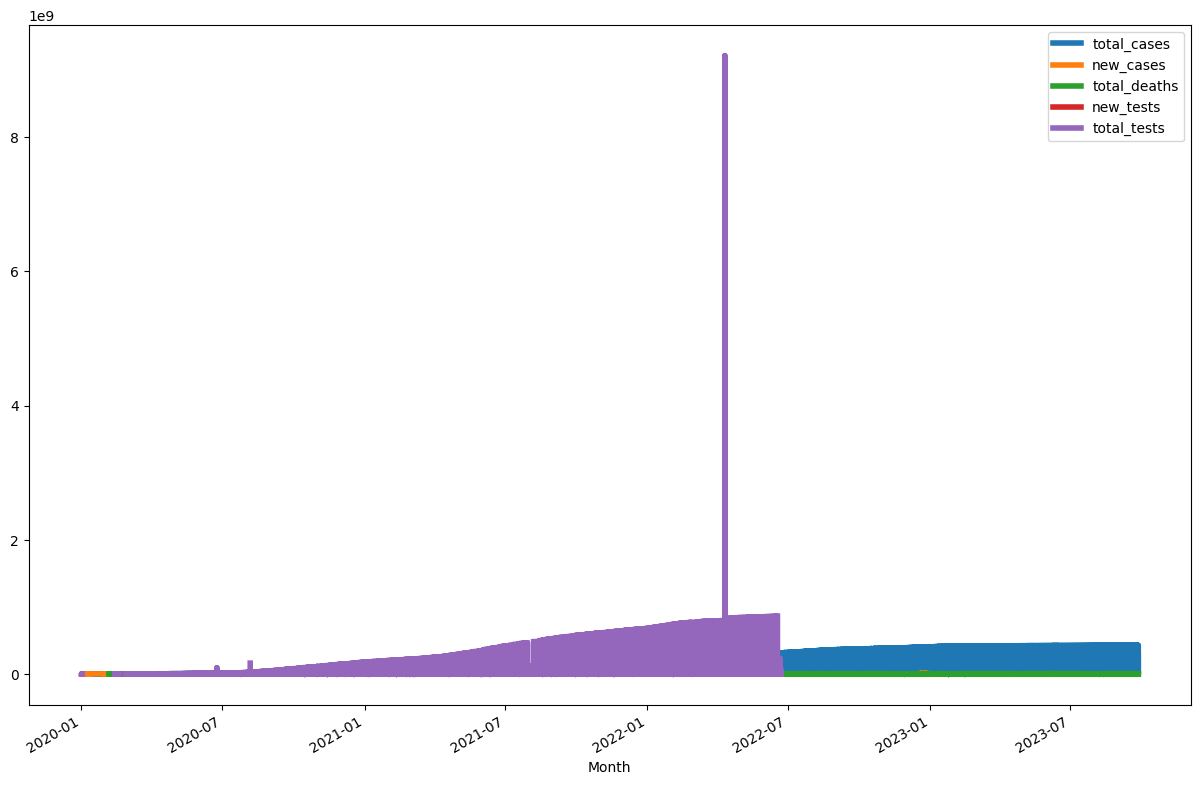

In [11]:
df1.plot(figsize = (15 , 10), linewidth = 4, fontsize = 10)
plt.xlabel('Month', fontsize = 10)

Text(0.5, 0, 'Month')

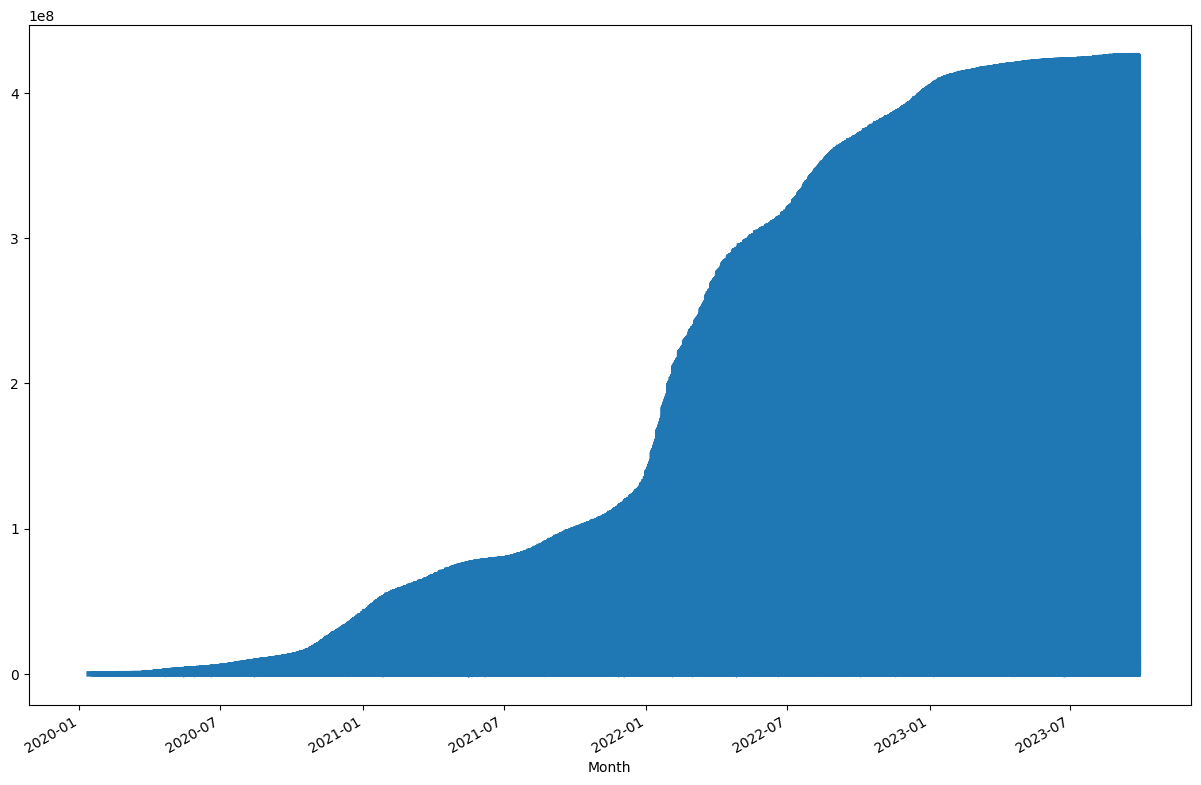

In [12]:
df1.total_cases.plot(figsize = (15 , 10), linewidth = 4, fontsize = 10)
plt.xlabel('Month', fontsize = 10)

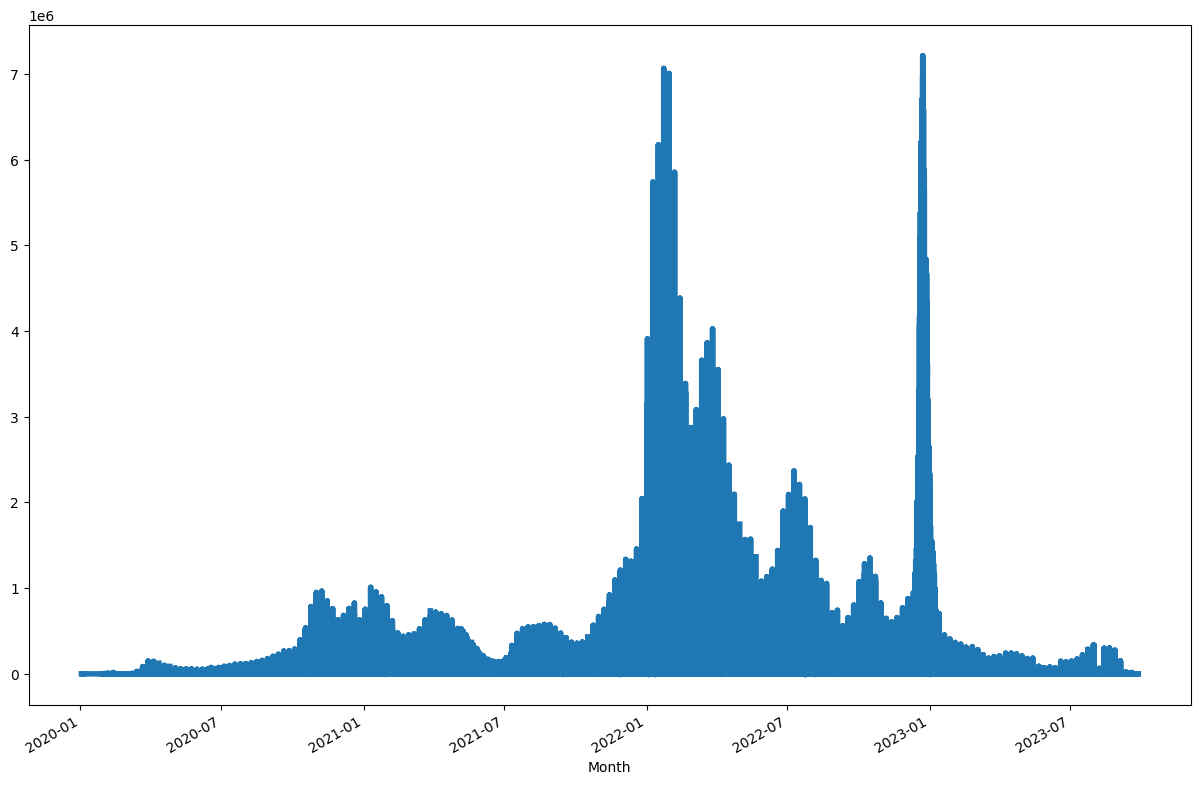

In [13]:
df1.new_cases.plot(figsize = (15 , 10), linewidth = 4, fontsize = 10)
plt.xlabel('Month' , fontsize = 10);

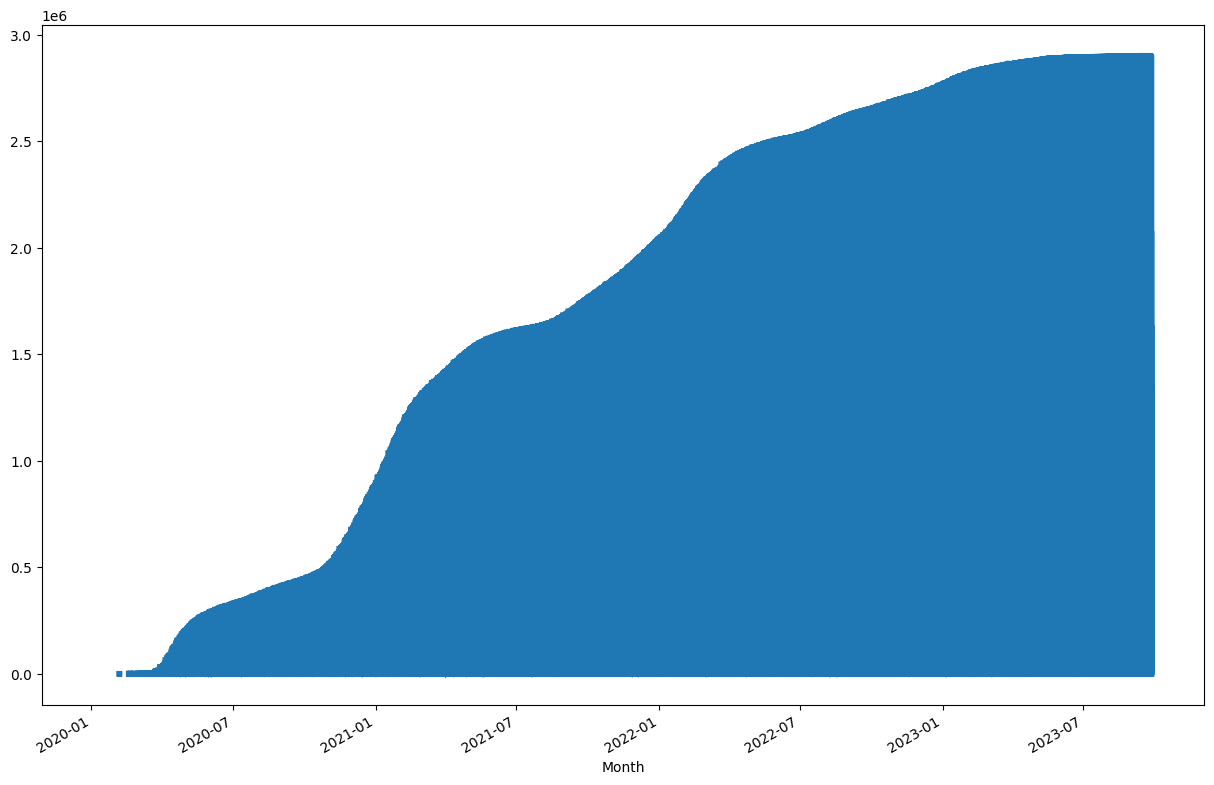

In [14]:
df1.total_deaths.plot(figsize = (15 , 10), linewidth = 4, fontsize = 10)
plt.xlabel('Month' , fontsize = 10);

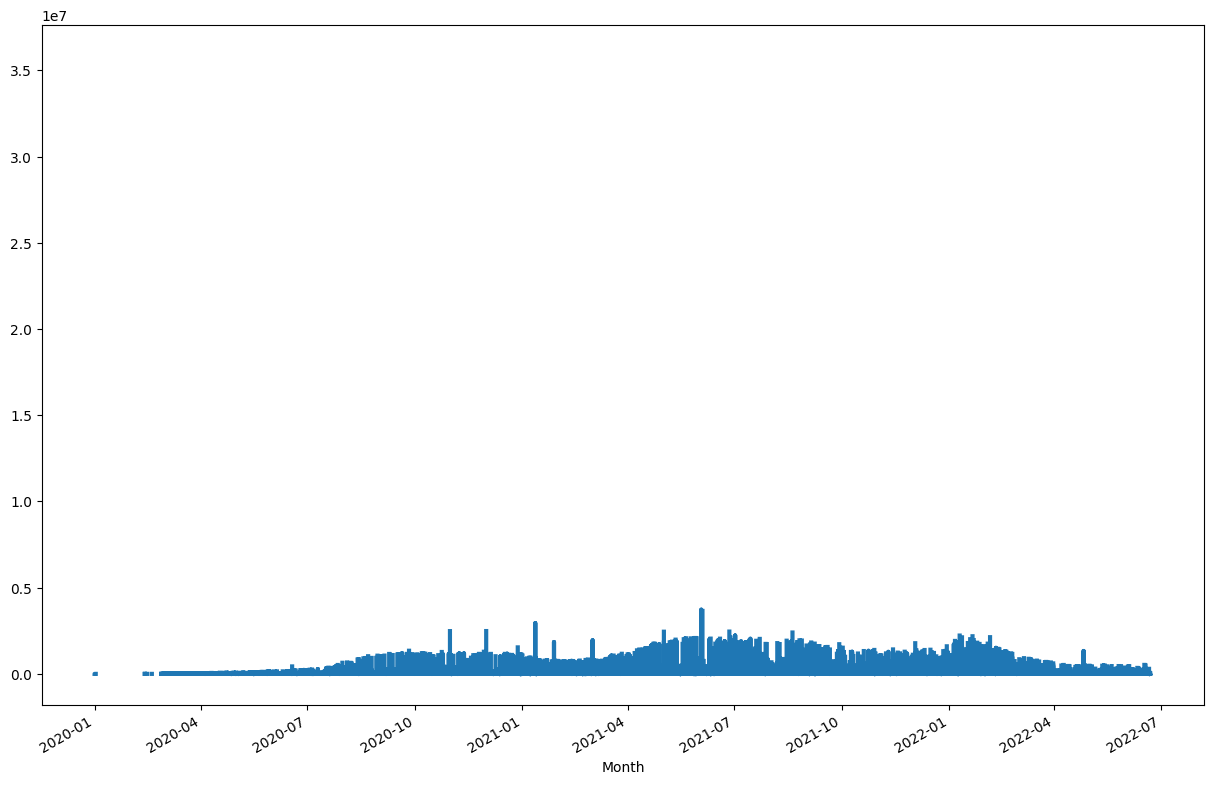

In [15]:
df1.new_tests.plot(figsize = (15 , 10), linewidth = 3, fontsize = 10)
plt.xlabel('Month' , fontsize = 10);

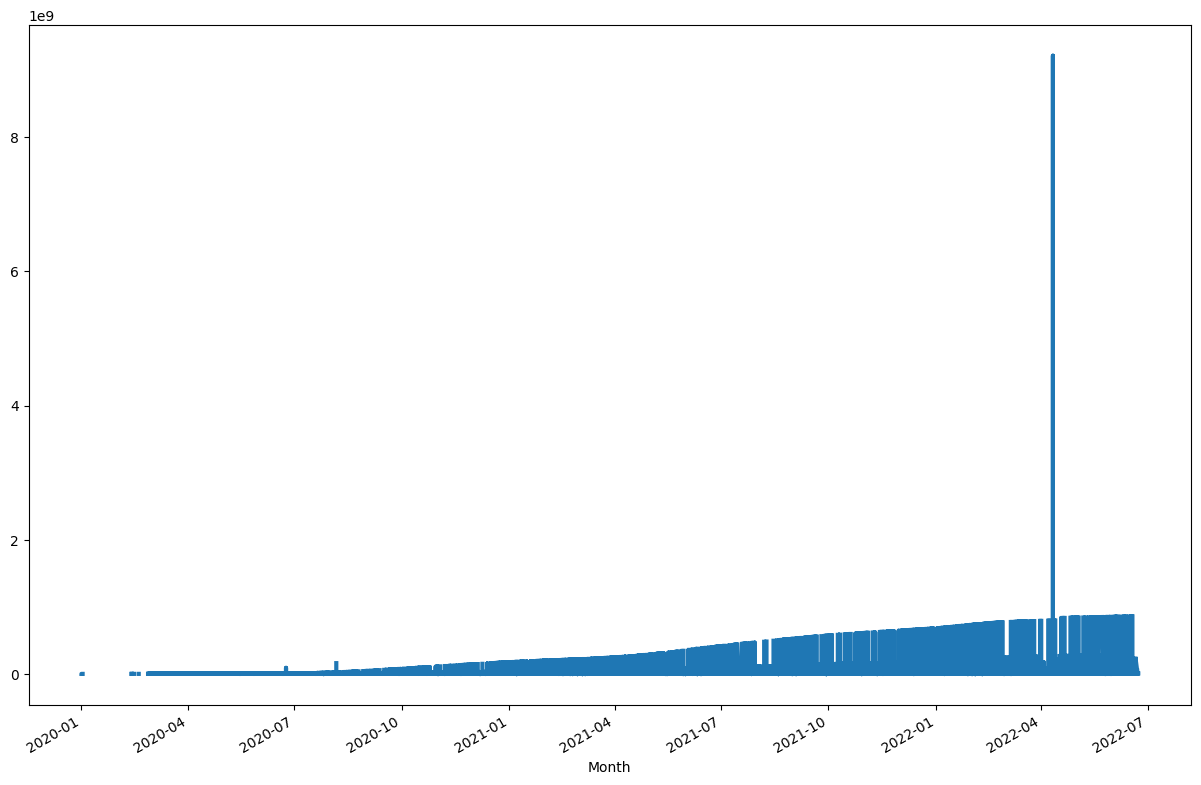

In [16]:
df1.total_tests.plot(figsize = (15 , 10), linewidth = 3, fontsize = 10)
plt.xlabel('Month' , fontsize = 10);

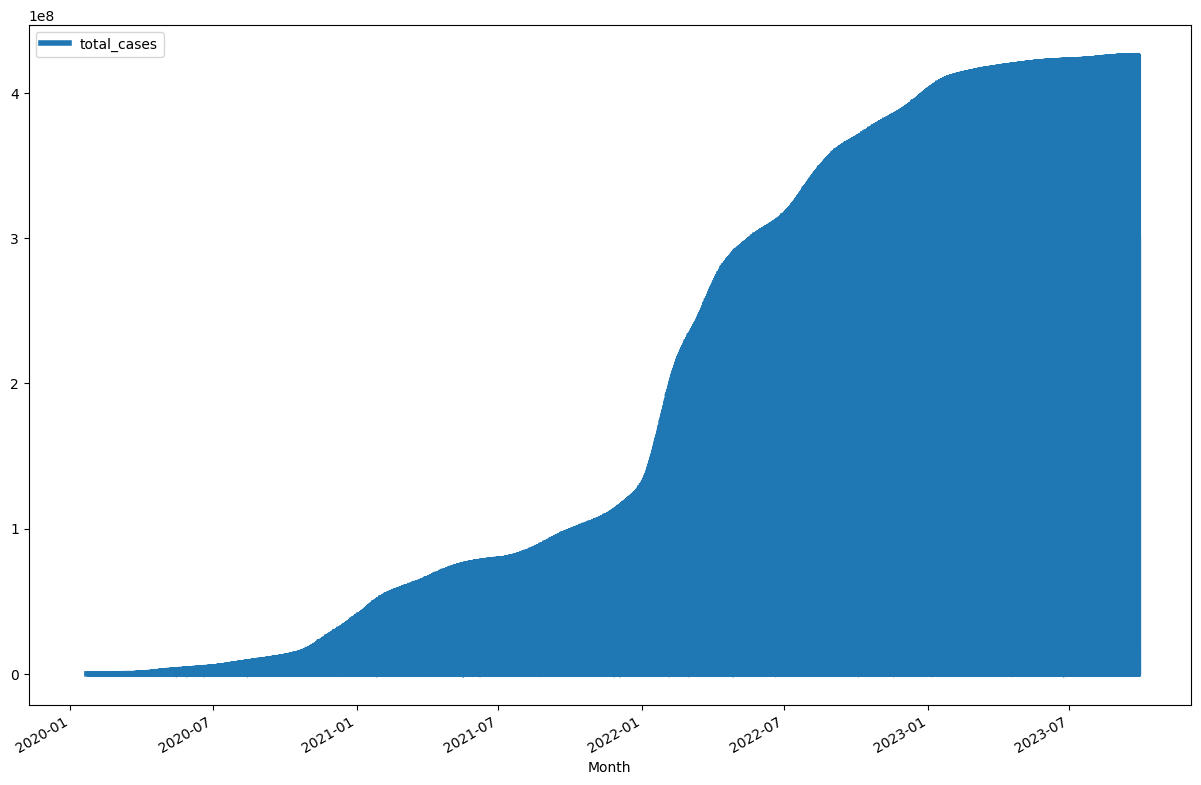

In [17]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (15 , 10), linewidth = 4, fontsize = 10)
plt.xlabel('Month' , fontsize = 10);

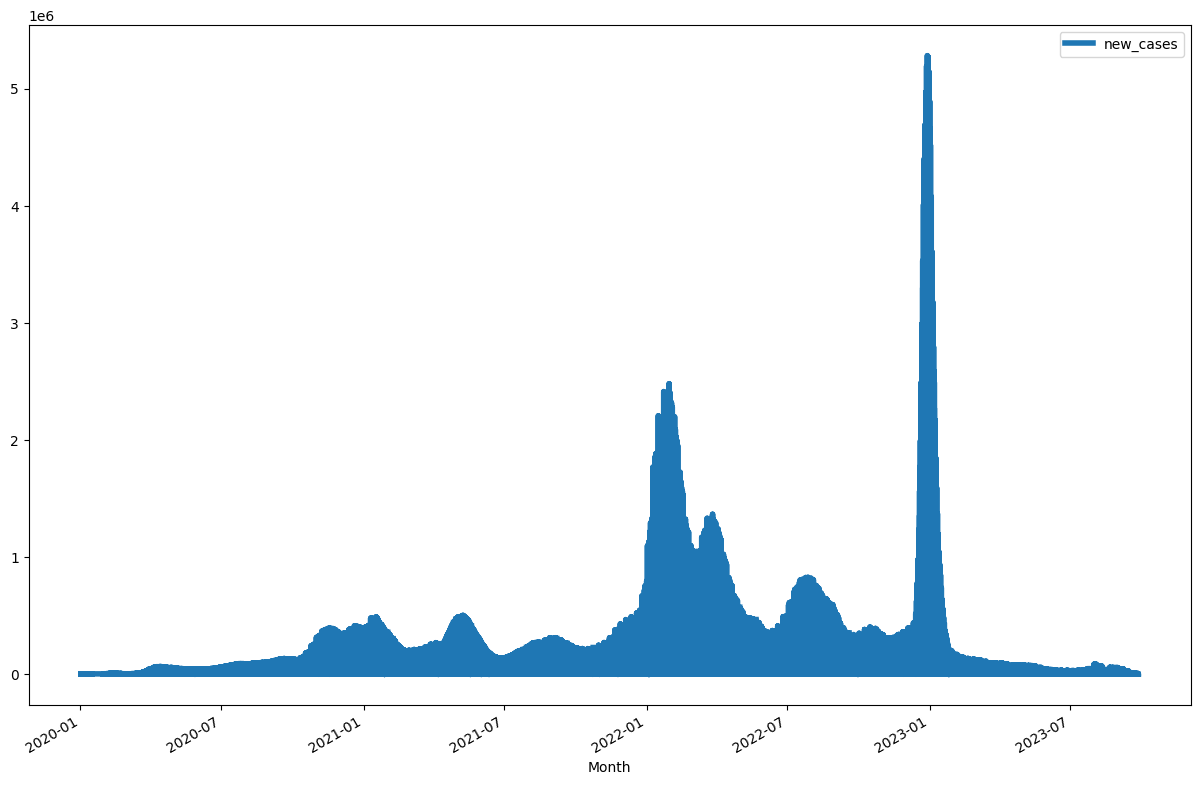

In [18]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (15 , 10), linewidth = 4, fontsize = 10)
plt.xlabel('Month' , fontsize = 10);

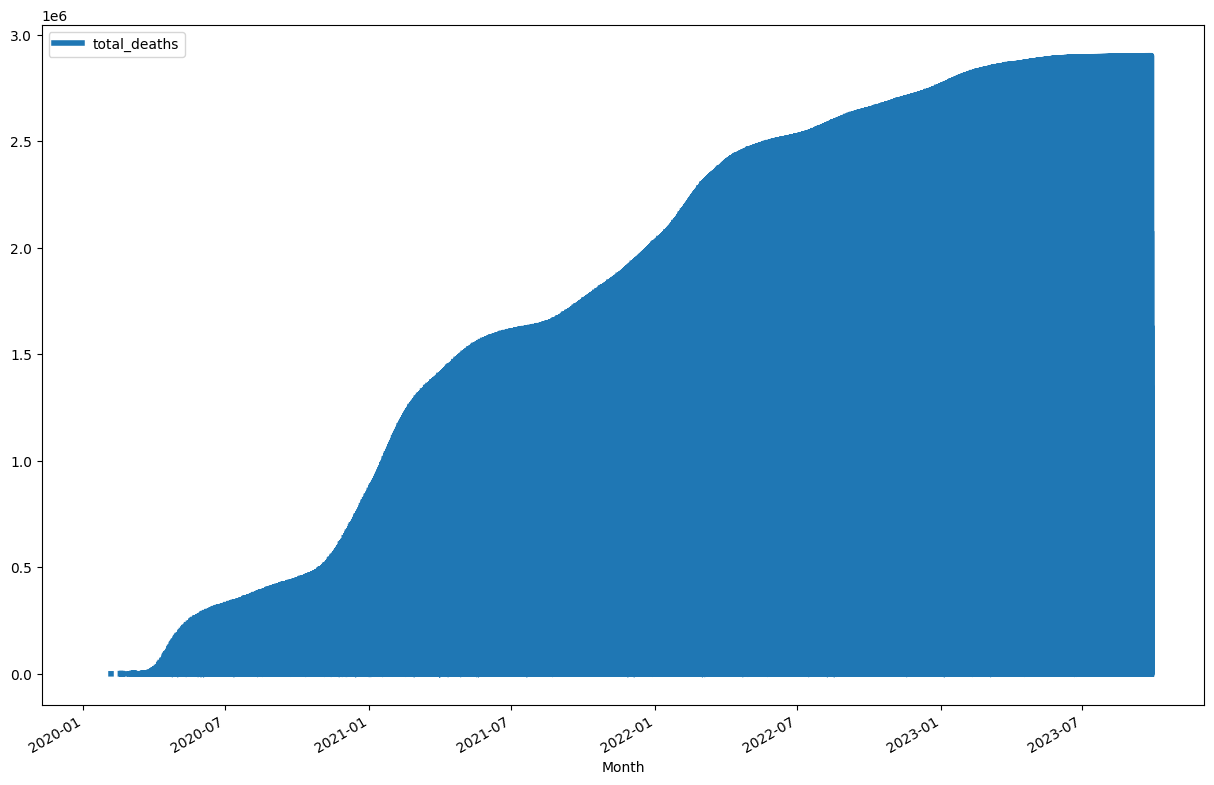

In [19]:
total_deaths = df1[['total_deaths']]
total_deaths.rolling(12).mean().plot(figsize = (15 , 10), linewidth = 4, fontsize = 10)
plt.xlabel('Month' , fontsize = 10);

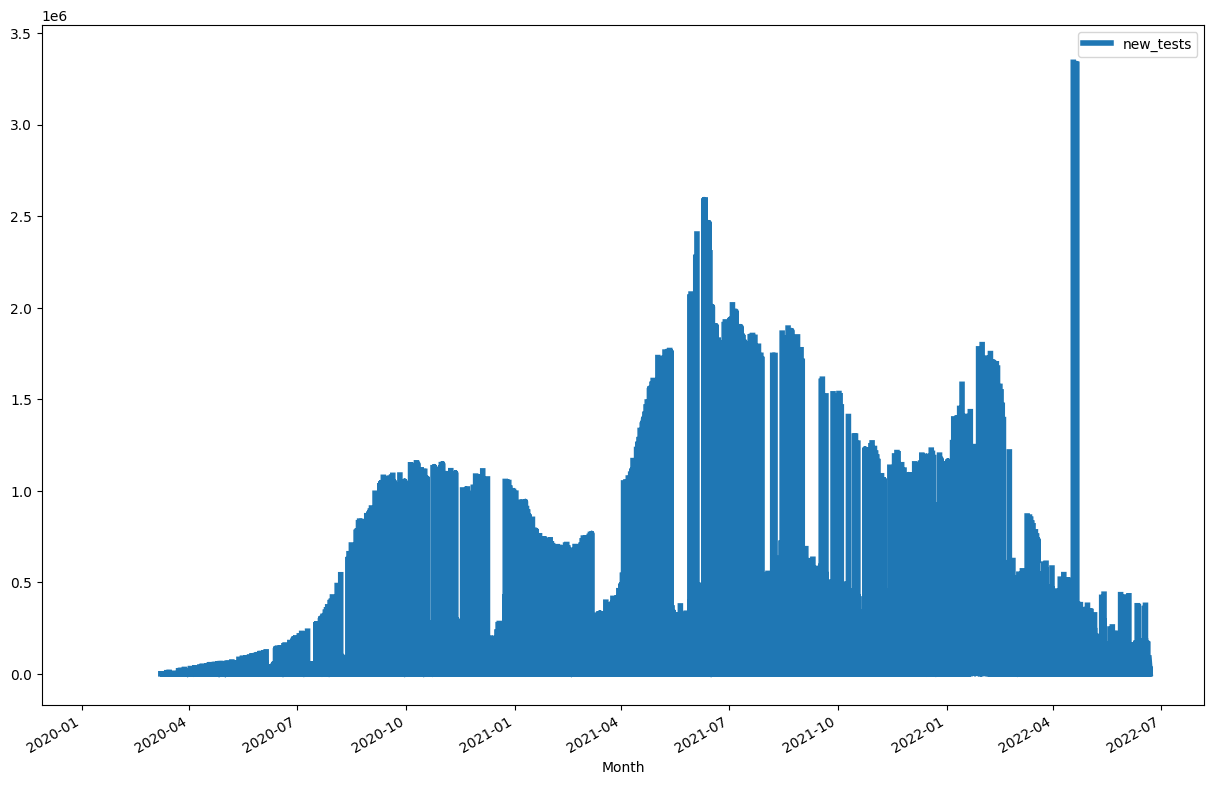

In [20]:
new_tests = df1[['new_tests']]
new_tests.rolling(12).mean().plot(figsize = (15 , 10), linewidth = 4, fontsize = 10)
plt.xlabel('Month' , fontsize = 10);

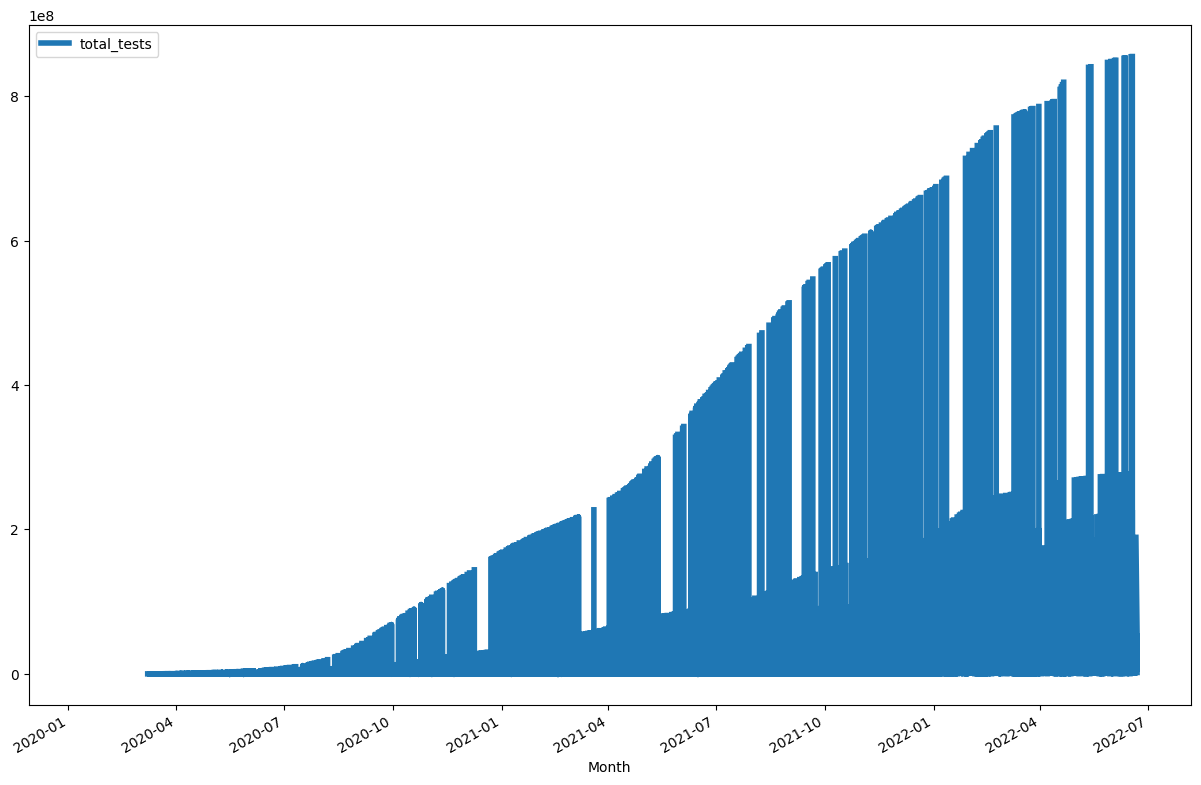

In [21]:
total_tests = df1[['total_tests']]
total_tests.rolling(12).mean().plot(figsize = (15 , 10), linewidth = 4, fontsize = 10)
plt.xlabel('Month' , fontsize = 10);

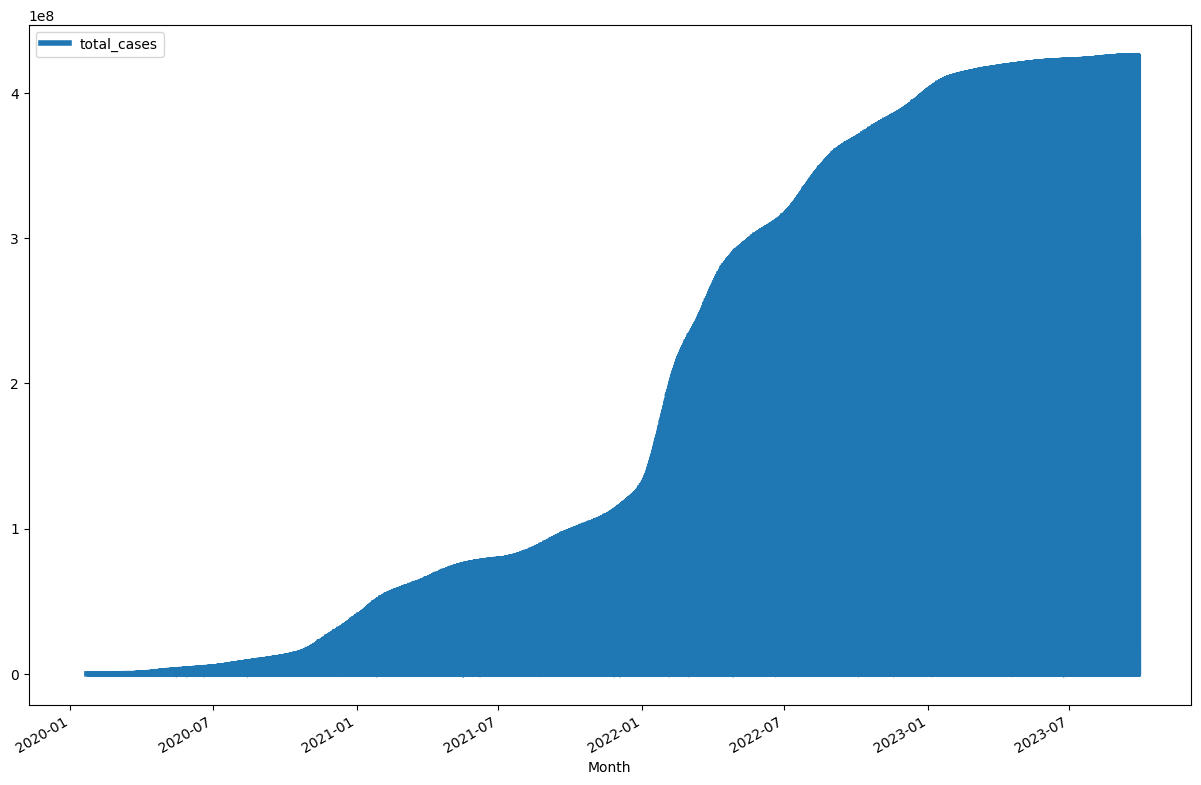

In [22]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (15 , 10), linewidth = 4, fontsize = 10)
plt.xlabel('Month' , fontsize = 10);